In [63]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
from util import simulate_austin
import importlib
import proplot as pplt
import string

In [61]:
importlib.reload(simulate_austin)

<module 'util.simulate_austin' from 'd:\\Thesis\\med_study_MC\\util\\simulate_austin.py'>

## Determine Alpha0

In [108]:
prevalences = np.logspace(0, 3, 4, base=2)/100
#prevalences = np.append(prevalences, 0.1)
prevalences

array([0.01, 0.02, 0.04, 0.08])

In [131]:
fig.get_figwidth, fig.get_figheight

(<bound method Figure.get_figwidth of Figure(nrows=2, ncols=3, refwidth=1.4)>,
 <bound method Figure.get_figheight of Figure(nrows=2, ncols=3, refwidth=1.4)>)

In [137]:
a0_med_ls_ls = []
#fig, axs = plt.subplots()#
fig, axs = pplt.subplots(ncols=3, nrows=2, refwidth=2,abc=True)
#axs = axs.flatten()
for i in range(3):
    X = simulate_austin.simulate_pats(string.ascii_lowercase[i], num_patients=1000)
    a0_med_ls = []
    #diffs_ls = []
    for j, prevalence in enumerate(prevalences):
        a0_med, diffs = simulate_austin.get_alpha0(X, prevalence=prevalence, iter=20)
        a0_med_ls.append(a0_med)
        axs[i].boxplot(y=np.divide(diffs, prevalence), positions=prevalence, widths=.002*(1+j))
        
        #diffs_ls.append(diffs)
    #axs[i].format(xlim=(0,0.11), xlocator=prevalences, xformatter='{:.2f}')
    axs[i].format(xlim=(0.005,0.09), xscale=('power', 1/2), xticks=prevalences)
    a0_med_ls_ls.append(a0_med)

## Determine beta for a specific treatment effect

We cannot use optimizer since we draw random variables and have thus a not differentiable function.

In [33]:
f(alpha_res_ls).max()

-0.0020000000000000018

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.511, -0.411, -0.311, -0.211, -0.111, -0.011,  0.089,  0.189,
         0.289,  0.389,  0.489]),
 <a list of 10 Patch objects>)

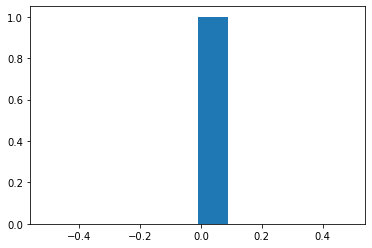

In [31]:
plt.hist(a)

In [46]:
z0 = simulate_exposure(variables=x, a0=-2.5)
np.sum(z0)/len(z0)

0.119

In [ ]:
def determine_alpha(prevalence, variables, epsilon=1e-3):
    """Compute alpha0 such that we get the desired prevalence."""
    a0 = 0
    z = np.zeros(len(variables))
    for _ in range(1000):
        z = simulate_exposure(variables, a0)
        if np.abs(np.sum(z)/len(z)-prevalence)<epsilon: 
            break
        elif np.sum(z)/len(z)>prevalence:
           pass 
        

In [25]:
z = simulate_exposure(0.1, x)
plt.hist(z)

TypeError: 'float' object is not subscriptable